     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

c:\Users\cau\anaconda3\envs\Project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

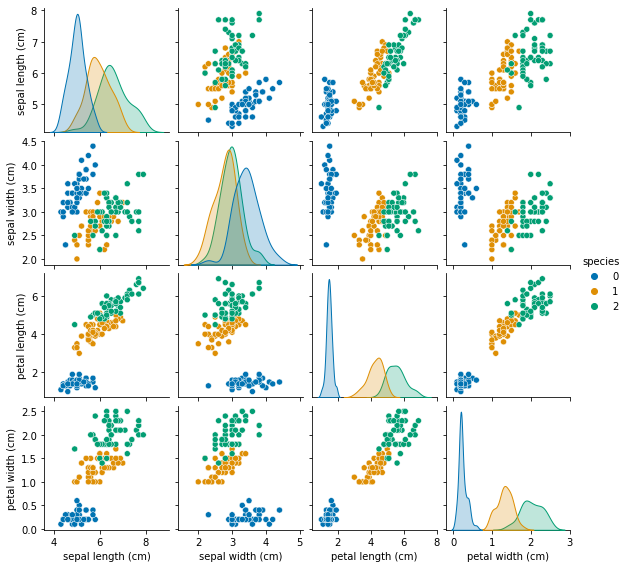

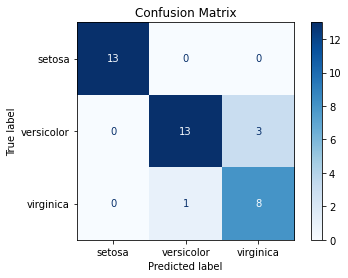

In [7]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import numpy as np


scaler = MinMaxScaler() # MinMax 스케일 객체 생성

iris=load_iris() # iris 데이터 로드
iris_sns=pd.DataFrame(data=iris.data, columns=iris.feature_names) # 데이터 시각화용 판다스 프레임 생성
iris_sns['species'] = iris.target # 라벨 추가

print(iris_sns) # 데이터, 라벨 값 출력

# data shape 확인
print('total data shape :', iris.data.shape)
print('total label shape :', iris.target.shape)
print('feature name :', iris.target_names)
print()

# data 분포도 시각화
sns.pairplot(iris_sns, hue="species", height = 2, palette = 'colorblind')

# train, test data set 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

# MinMax 스케일 실시
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 스케일 실시한 데이터 확인
print("train data")
print(X_train)
print("\ntest data")
print(X_test)

# train, test data shape 확인
print('train data shape :', X_train.shape)
print('train label shape :', y_train.shape)
print('test data shape :', X_test.shape)
print('test label shape :', y_train.shape)

LR = LogisticRegression() # 로지스틱 회귀 모델 생성
LR.fit(X_train, y_train) # 모델 학습
y_pred=LR.predict(X_test) # test data 예측

print('train score :', LR.score(X_train, y_train)) # train score 출력
print('test score :', LR.score(X_test, y_test)) # test score 출력
print('report')
print(classification_report(y_pred, y_test))  # 클래스별 예측 score 출력

# test data 혼동행렬 생성 및 출력
print('혼동행렬') 
labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(LR, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Blues, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix')